In [1]:
from food.tools import *
from food.paths import *
from food.psql import *

import pandas as pd
import numpy as np
from pathlib import Path

# !nbdev_build_lib

In [2]:
photos_path = testset_path/'test_photos'

In [3]:
testdf = pd.read_csv(testset_path/'test_set.csv')

testdf.columns = ['name_f','','','','energy_f','','','','','weight_f','composition_f','url']
testdf = testdf.drop(columns = [c for c in testdf.columns if c == ''])

for c in ['energy_f','weight_f']:
    testdf[c] = testdf[c].str.replace(',','.').astype('float64')
    

testdf['url'] = testdf['url'].apply(lambda id:f"https://glovo.away.guru/test_photos/{id}.jpeg")

In [4]:
from food.search import *

In [5]:
from IPython.display import clear_output

In [9]:
r = []
n=0
fact = testdf.reset_index(drop=True)
for image in fact['url'].tolist():
    clear_output()
    print(n)
    r.append(search_image(image,env='prod'))
    n+=1

195


0.23651955819466644
0.25940873457376773
0.2685096350634892
0.2686264434340494
0.2686264434340494


In [22]:
image

'https://glovo.away.guru/test_photos/3fbd4cbe-478a-4482-99e2-43588541e950.jpeg'

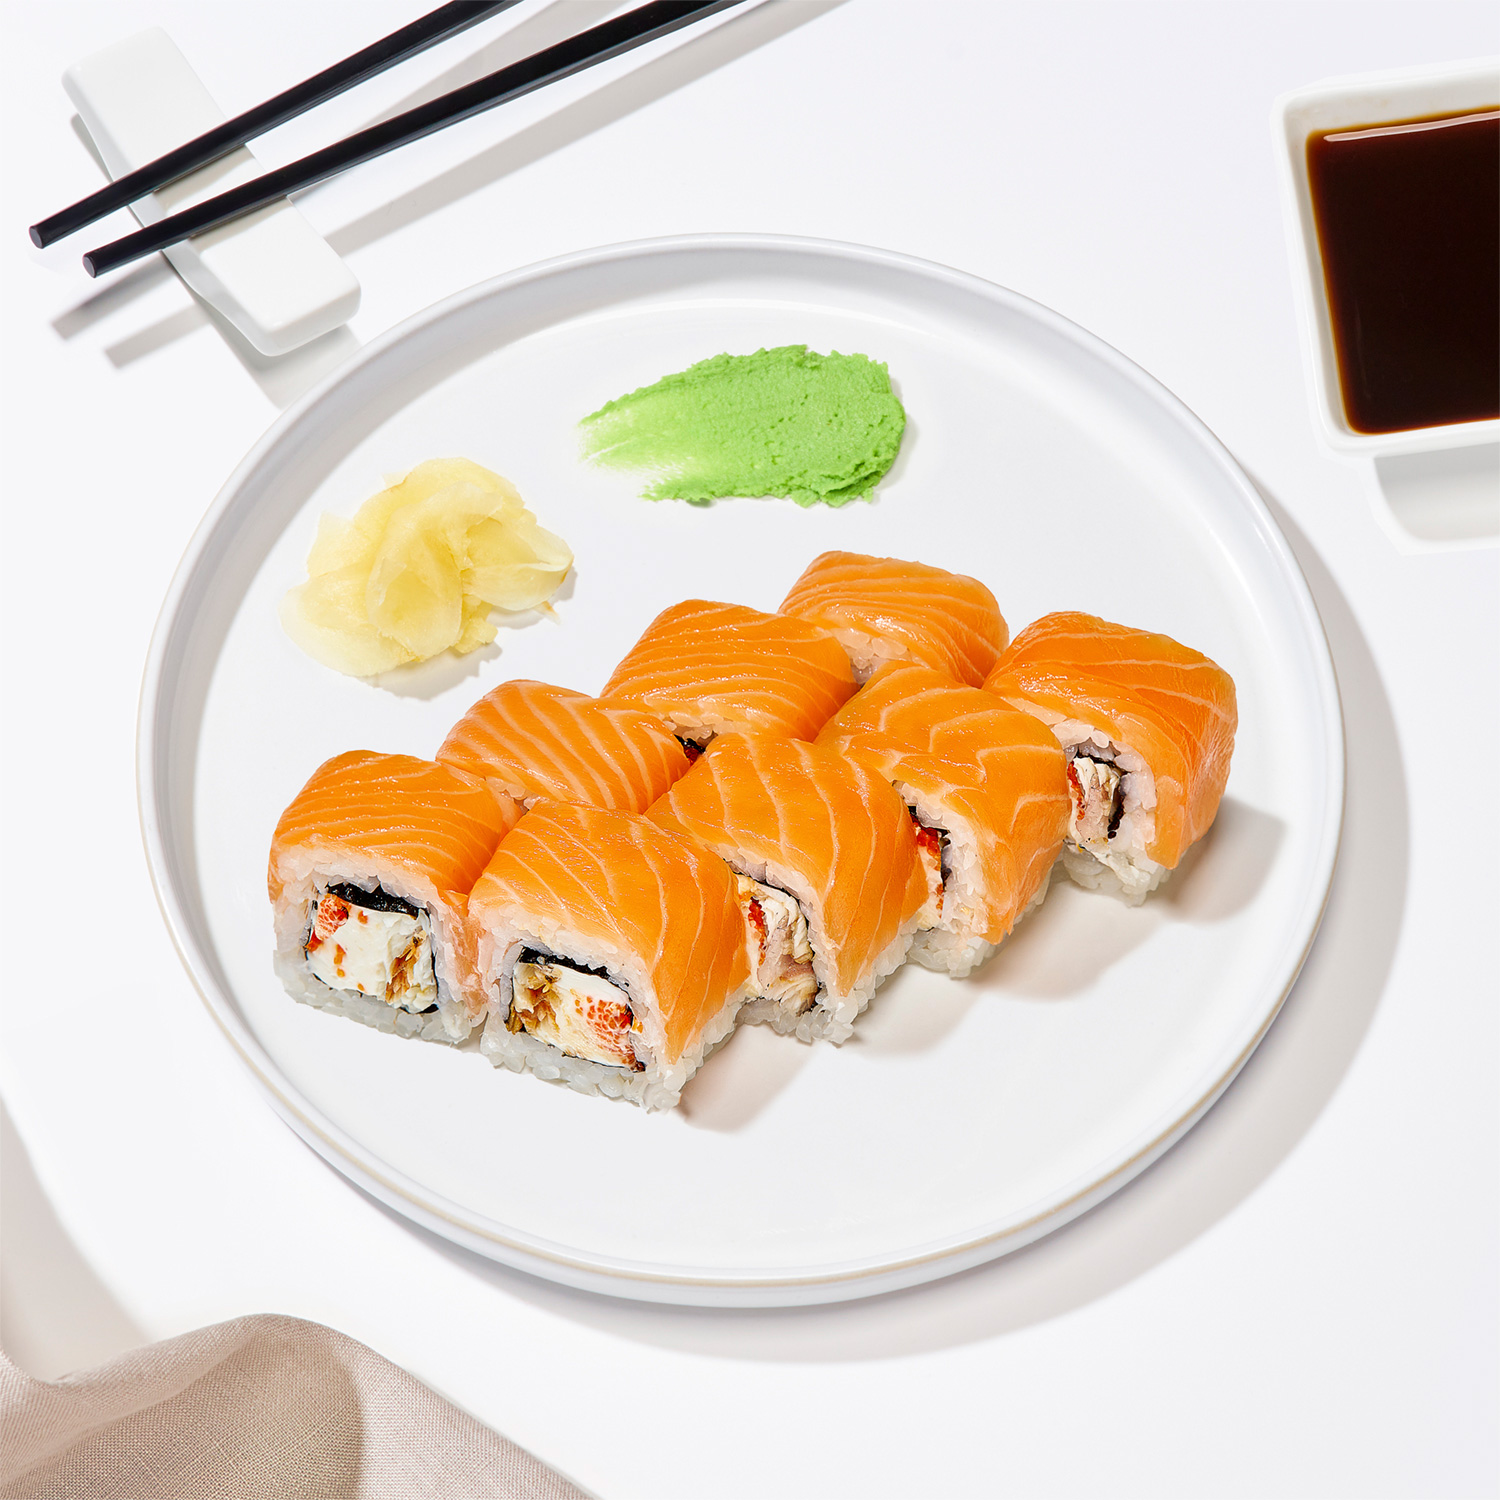

In [21]:
get_image_from_url(image)

In [10]:
rr = fact.join(pd.concat(r).reset_index(drop=True))
rrr = rr[['energy_f','energy','url','description','composition_f']]
rrr['error'] = (rrr['energy_f']/rrr['energy']-1).abs()
rrr = rrr.sort_values('error',ascending = False).reset_index(drop=True)


/tmp/ipykernel_637745/790832201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rrr['error'] = (rrr['energy_f']/rrr['energy']-1).abs()


In [13]:
rrr['error'].mean()

0.5934778869425992

In [18]:
rrr['energy'].sum()/rrr['energy_f'].sum()

0.7766768462114001

In [19]:
rrr.describe()

energy_f      energy       error
count  196.000000  196.000000  196.000000
mean   181.319337  140.826531    0.593478
std     92.558375   65.085510    0.550540
min      0.000000    1.000000    0.001000
25%    136.312500   90.750000    0.153079
50%    177.310000  130.000000    0.390609
75%    228.162500  175.250000    0.914037
max    608.670000  343.000000    2.374884

In [21]:
to_pickle(rrr,'test_result.pkl')

In [11]:
rrr.head(10)

energy_f  energy                                                url  \
0    145.12    43.0  https://glovo.away.guru/test_photos/fb79e6b9-b...   
1    177.65    53.0  https://glovo.away.guru/test_photos/b6dc5bae-4...   
2    264.41    79.0  https://glovo.away.guru/test_photos/78763af2-0...   
3    503.65   159.0  https://glovo.away.guru/test_photos/9d1c95a3-0...   
4    221.51    72.0  https://glovo.away.guru/test_photos/563bc8d6-7...   
5    263.50    87.0  https://glovo.away.guru/test_photos/0c44843c-e...   
6    275.87    92.0  https://glovo.away.guru/test_photos/94df5b7e-9...   
7    203.14    68.0  https://glovo.away.guru/test_photos/87f3730f-b...   
8    203.24    71.0  https://glovo.away.guru/test_photos/9cfba0bc-c...   
9    146.72    53.0  https://glovo.away.guru/test_photos/a7d37b03-a...   

                                         description  \
0  Pepper, hot, pickled. Snowpea, fresh, cooked, ...   
1  Basil, raw. Sushi roll, avocado. Sushi roll, C...   
2  Sushi roll, California. Sushi roll tuna. Snowp...   
3  Chicken drumstick, baked, broiled, or roasted,...   
4   Sushi roll tuna. Pepper, banana, raw. Basil, raw   
5  Seaweed, cooked, fat added. Beef, rice, and ve...   
6  Sushi, topped with crab. Rice, brown, with car...   
7  Sushi roll tuna. Sushi, topped with salmon. Ba...   
8  Sushi roll tuna. Pepper, banana, raw. Sushi ro...   
9  Basil, raw. Sushi roll, avocado. Sushi roll, C...   

                                       composition_f     error  
0  Состав: рис, филе лосося, соус спайси, огурец,...  2.374884  
1  Состав: рис, заправка для риса, огурец, водоро...  2.351887  
2  Состав: рис, креветки, огурец свежий, сыр слив...  2.346962  
3  Состав: Курица, соевый соус синг сонг, масло р...  2.167610  
4  Состав: рис, заправка для риса, филе угря, сос...  2.076528  
5  Состав:Рис,вода,сахар,соль,уксус мицукан(спирт...  2.028736  
6  Состав: Рис, вода, сахар, соль, уксус мицукан ...  1.998587  
7  Состав: Рис, заправка для риса, креветки, соус...  1.987353  
8  Состав: рис, филе угря, огурец, соус спайси( м...  1.862535  
9  Состав: Рис, огурец, водоросли нори, имбирь ма...  1.768302

In [51]:
n =4

In [52]:
rrr.iloc[n]['description'],rrr.iloc[n]['composition_f']

('Sushi roll tuna. Pepper, banana, raw. Basil, raw',
 'Состав: рис, заправка для риса, филе угря, сосус спайс( майонез, перец кайенский, соус Кимчи), водоросли нори, имбирь маринованный, васаби.\nПищевая ценность (средние значения) в 100 г белки - 9 г./ жиры - 12 г./ углеводы - 25 г.\nЭнергетическая ценность: 253 ккал/1059 кДж.\nУсловия хранения: при температуре от +2 до +6 °С.\nМасса нетто:160г.\nТУ 10.85.12-004-41745829-2021')

In [53]:
url = rrr.iloc[n]['url']

In [54]:
r, desc, sel,score = multiple_foods(url,env='prod')

0.2083405177707428
0.23457885966020348
0.24664344339930136
0.24917151571554463
0.24917151571554463


In [55]:
r

id  \
text                                                          
the food is egg rolls, dumplings, sushi . it ha...  1102350   
the food is other vegetables and combinations ....  1103373   
the food is not included in a food category . i...  1103348   
the food is other vegetables and combinations ....  1103569   
the food is stir-fry and soy-based sauce mixtur...  1099242   

                                                                             description  \
text                                                                                       
the food is egg rolls, dumplings, sushi . it ha...                       Sushi roll tuna   
the food is other vegetables and combinations ....                   Pepper, banana, raw   
the food is not included in a food category . i...                            Basil, raw   
the food is other vegetables and combinations ....  Snowpea, fresh, cooked, no added fat   
the food is stir-fry and soy-based sauce mixtur...       Chicken or turkey with teriyaki   

                                                                                 category  \
text                                                                                        
the food is egg rolls, dumplings, sushi . it ha...            Egg rolls, dumplings, sushi   
the food is other vegetables and combinations ....      Other vegetables and combinations   
the food is not included in a food category . i...        Not included in a food category   
the food is other vegetables and combinations ....      Other vegetables and combinations   
the food is stir-fry and soy-based sauce mixtur...  Stir-fry and soy-based sauce mixtures   

                                                    energy  protein   carb  \
text                                                                         
the food is egg rolls, dumplings, sushi . it ha...    97.0     7.40  15.30   
the food is other vegetables and combinations ....    27.0     1.66   5.35   
the food is not included in a food category . i...    23.0     3.15   2.65   
the food is other vegetables and combinations ....    44.0     2.91   7.84   
the food is stir-fry and soy-based sauce mixtur...   163.0    25.73   1.62   

                                                     fat     score  count  \
text                                                                        
the food is egg rolls, dumplings, sushi . it ha...  0.26  0.709553      7   
the food is other vegetables and combinations ....  0.45  0.690625      3   
the food is not included in a food category . i...  0.64  0.660580      2   
the food is other vegetables and combinations ....  0.21  0.668684      1   
the food is stir-fry and soy-based sauce mixtur...  5.96  0.673676      1   

                                                    cumcount  
text                                                          
the food is egg rolls, dumplings, sushi . it ha...  0.500000  
the food is other vegetables and combinations ....  0.714286  
the food is not included in a food category . i...  0.857143  
the food is other vegetables and combinations ....  0.928571  
the food is stir-fry and soy-based sauce mixtur...  1.000000

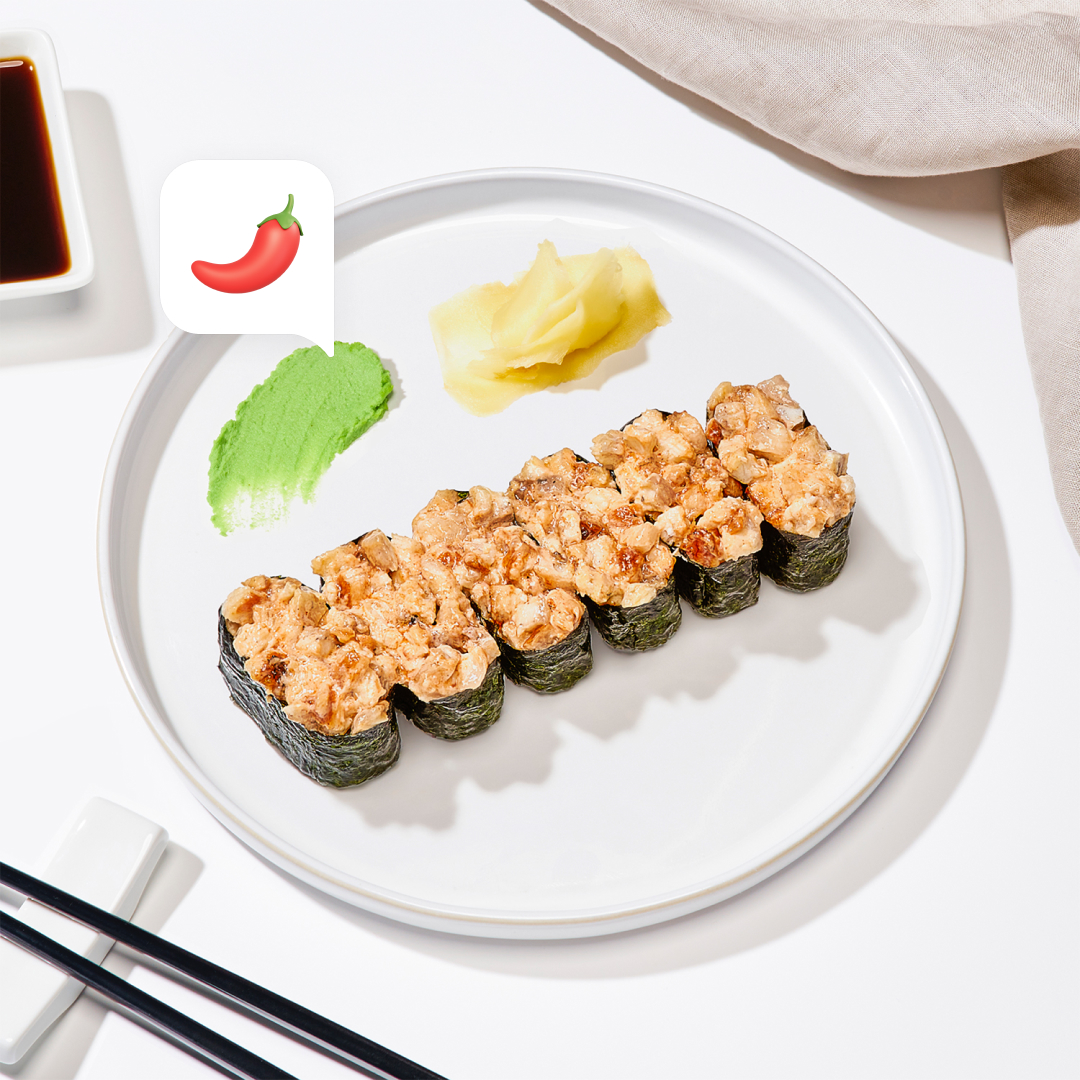

In [56]:
get_image_from_url(rrr.iloc[n]['url'])

In [57]:
rrr.iloc[n]['url']

'https://glovo.away.guru/test_photos/563bc8d6-7f74-46db-8f6d-2e7fc7664f01.jpeg'

In [ ]:
#ids to explude:
badge = ['https://glovo.away.guru/test_photos/fb79e6b9-bd1d-4998-9aaa-ea5bfdceac86.jpeg',
         'https://glovo.away.guru/test_photos/b6dc5bae-4551-4168-8b05-9a6a7c82ec3a.jpeg',
         'https://glovo.away.guru/test_photos/78763af2-05fc-4e6d-8f76-0aa3b6408561.jpeg',
         ]

wrong_test = ['https://glovo.away.guru/test_photos/9d1c95a3-0bb7-4adf-857c-331376379621.jpeg',
              
              
              ]

In [58]:
rrr.iloc[n]['url']

'https://glovo.away.guru/test_photos/58c83189-bf88-415b-8582-3ff587bd08fe.jpeg'

In [88]:
rrr.iloc[n]['url']

'https://glovo.away.guru/test_photos/9e7c99aa-b620-466e-adbb-80ef1c34b027.jpeg'

In [ ]:
'https://glovo.away.guru/test_photos/58c83189-bf88-415b-8582-3ff587bd08fe.jpeg',
'https://glovo.away.guru/test_photos/9e7c99aa-b620-466e-adbb-80ef1c34b027.jpeg',
